# 3. Clasificación
    
En este notebook vamos a aprender los fundamentos de la clasificación, y para ello vamos a utilizar el dataset llamado MNIST. Este dataset contiene 70.000 pequeñas imágenes de dígitos escritos a mano por estudiantes de secundaria y por trabajadores de la oficina del censo de los Estados Unidos. Cada imagen está etiquetada con el dígito que representa.

Este dataset es muy famoso, es como el "hello world" de la clasificación, y cuando alguien desarrolla algún algoritmo de clasificación, siente curiosidad por ver cómo se comporta el algoritmo de clasificación sobre este conjunto de datos.

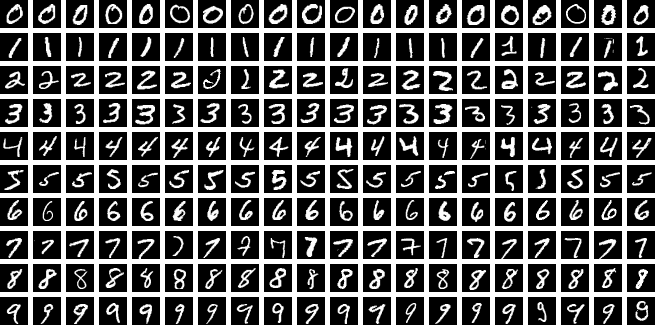

Para el aprendizaje, vamos a utilizar scikit-learn, que es un módulo de Python para aprendizaje automático construido sobre SciPy y distribuido bajo la licencia BSD de 3 cláusulas. El proyecto se inició en 2007 por David Cournapeau como un proyecto de Google Summer of Code, y desde entonces muchos voluntarios han contribuido.

Scikit-Learn proporciona algunas funciones de ayuda que permiten descargar algunos datasets famosos, incluido este. El siguiente código nos va a ayudar a descargar este conjunto de datos

In [86]:
# El proyecto requiere una versión de python 3.7 o superior
import sys
assert sys.version_info >= (3, 7)

In [87]:
# Verificar que la versión de scikit-learn es al menos la 1.0.1
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [88]:
# Configuración de Matplotlib, para mejorar la legibilidad de los gráficos
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [89]:
# Función para guardar las figuras generadas, en una carpeta específica.
# Las figuras se guardan en formato PNG con una resolución de 300 dpi.
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

El paquete `sklearn.dataset` contiene principalmente tres tipos de funciones:

- **`fetch_*`**: para descargar conjuntos de datos reales
- **`load_*`**: para cargar pequeños conjuntos de prueba incluidos en el paquete sin necesidad de utilizar internet
- **`make_*`**: para generar conjuntos de datos para probar

In [90]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [91]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

En general, los conjuntos de datos se devuelven como una tupla (X,y) que contienen los datos de entrada y los datos objetivo (input, target), ambos como arrays numPy.

In [92]:
# Exploramos las claves disponibles en el objeto mnist
# El dataset MNIST contiene varios atributos, pero principalmente usaremos 'data' y 'target'
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [93]:
# Extraemos los datos de entrada (X) y las etiquetas objetivo (y) del dataset
# X contiene las imágenes de dígitos representadas como arrays de píxeles
# y contiene las etiquetas (los dígitos del 0 al 9) correspondientes a cada imagen
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [94]:
# Visualizamos la matriz X (características de entrada)
# Cada fila representa una imagen y cada columna representa un píxel
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [95]:
# Verificamos la forma (shape) del array X
# El resultado (70000, 784) significa:
# - 70,000 imágenes en total
# - 784 características por imagen (28x28 píxeles = 784)
X.shape

(70000, 784)

In [96]:
# Visualizamos el vector y (etiquetas objetivo)
# Cada elemento es un dígito del '0' al '9' que representa qué número muestra cada imagen
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [97]:
# Verificamos la forma del vector y
# El resultado (70000,) significa que tenemos 70,000 etiquetas, una por cada imagen
y.shape

(70000,)

In [ ]:
# Calculamos el número total de píxeles en cada imagen del dataset MNIST
# Cada imagen tiene dimensiones de 28x28 píxeles, lo que resulta en 784 características
# Este número coincide con la segunda dimensión de X.shape que vimos anteriormente
28*28

Hay 70.000 imagenes y cada imagen tiene 784 features (caracteristicas). esto es así porque cada imagen tiene 28x28 pixeles, y cada caracteristica represetna la intensidad de cada uno de los pixeles de la imagen (de 0 a 255, de blanco a negro)

Echemos un vistazo a una de las cifras del conjunto de datos. Todo lo que necesitamos hacer es tomar el vector de características de una instancia, convertirlo a un array de 28 × 28 y mostrarlo usando la función `imshow()` de Matplotlib. Usamos `cmap="binary"` para obtener un mapa de colores en escala de grises donde 0 es blanco y 255 es negro.


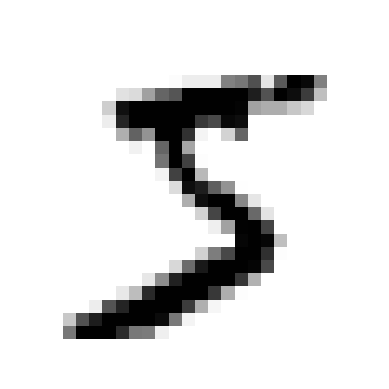

In [99]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary')
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
# Verificamos la etiqueta (label) del primer dígito que visualizamos anteriormente
# Esto nos confirma qué número representa la imagen que acabamos de mostrar
y[0]

Para dar una idea de la complejidad de la tarea de clasificacion, vamos a mostrar algunas imagenes adicionales del conjunto de datos de MNIST. Pero antes, y muy importante, siempre debemos crear un conjunto de datos de test y apartarlo desde el inicio antes de revisar los datos con mas detenimiento, para prevenir posibles sesgos. 

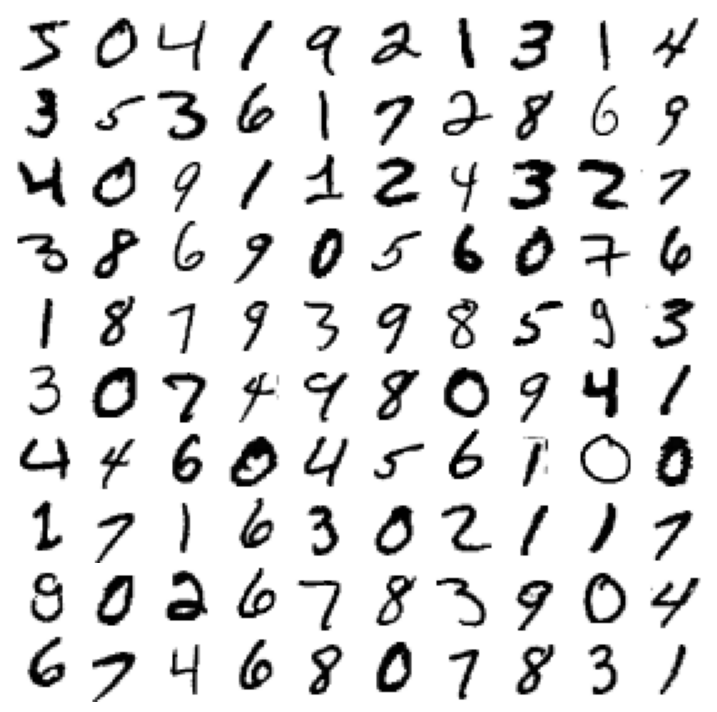

In [19]:
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
save_fig("more_digits_plot", tight_layout=False)
plt.show()

El conjunto de datos MNIST ya viene dividido en conjunto de entrenamiento (60.000 primeras muestras) y conjunto de prueba o test set (últimas 10.000 muestras), con lo cual:

In [ ]:
# Dividimos el dataset MNIST en conjuntos de entrenamiento y prueba
# El dataset MNIST ya viene pre-dividido:
# - Primeras 60,000 muestras: conjunto de entrenamiento (training set)
# - Últimas 10,000 muestras: conjunto de prueba (test set)
# X_train, X_test: características (imágenes) para entrenar y probar
# y_train, y_test: etiquetas (dígitos del 0-9) para entrenar y probar
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

El conjunto de entrenamiento ya está barajado por nosotros, lo cual es bueno porque garantiza que todos los pliegues de la validación cruzada serán similares (no queremos que a un pliegue le falten algunos dígitos). Además, algunos algoritmos de aprendizaje son sensibles al orden de las instancias de entrenamiento y tienen un rendimiento deficiente si reciben muchas instancias similares seguidas. Barajar el conjunto de datos asegura que esto no ocurra.

## 3.1. Entrenar un Clasificador Binario

Por ahora, vamos a simplificar el problema y vamos a intentar identificar un único dígito, el dígito '5'. este detector de '5' será un ejemplo de un clasificador binario, capaz de detectar el número '5' y detectar lo que no es el número '5' (de ahí lo de clasificador binario).

primero, crearemos los vectores objetivo para esta tarea de clasificacion:

In [ ]:
# Creamos vectores objetivo para el clasificador binario de detección de '5'
# y_train_5: True para todos los '5', False para todos los demás dígitos (conjunto de entrenamiento)
# y_test_5: True para todos los '5', False para todos los demás dígitos (conjunto de prueba)
# Estos vectores booleanos nos permiten entrenar un clasificador que distingue entre "es 5" y "no es 5"
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

Vamos ahora a escoger un clasificador y entrenarlo. Un clasificador interesante para comenzar es el **clasificador SGD** (Stochastic Gradient Descent) o clasificador de descenso de gradiente estocástico, usando la clase `SGDClassifier`. 

Este clasificador es capaz de manejar conjuntos de datos muy grandes de manera muy eficiente. Esto es en parte porque trata las muestras de entrenamiento de manera individual, lo que también lo hace adecuado para el aprendizaje en línea (online learning).

Creemos entonces un `SGDClassifier` y entrenémoslo sobre todo el conjunto de entrenamiento:

In [22]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


Ahora ya lo podemos usar para detectar imagenes del número '5':

In [23]:
sgd_clf.predict([some_digit])

array([ True])

El clasificador indica que esta imagen podría representar el '5'. Parece que en este caso lo ha hecho bien. Vamos ahora a evaluar el rendimiento de este modelo.

## 3.2. Medidas de rendimiento

Evaluar un clasificador suele ser significativamente más complicado que evaluar un regresor, así que dedicaremos algo de tiempo a este tema. Existen muchas medidas de rendimiento disponibles, así que vamos a aprender un montón de conceptos y siglas nuevas.

### 3.2.1. Midiendo la precisión usando la validación cruzada

Una buena forma de evaluar un clasificador es utilizar la **validación cruzada**. Usemos ahora la función `cross_val_score()` para evaluar nuestro modelo `SGDClassifier` usando validación cruzada de k pliegues (*k-fold cross-validation*) con tres pliegues.

Recordemos que la validación cruzada de k pliegues significa que dividimos el conjunto de entrenamiento k veces (en este caso 3), luego entrenamos el modelo k veces, dejando fuera un pliegue diferente cada vez para la evaluación.

In [ ]:
# Importamos la función para realizar validación cruzada
from sklearn.model_selection import cross_val_score

# Evaluamos el clasificador SGD usando validación cruzada de 3 pliegues
# Parámetros:
# - sgd_clf: el clasificador a evaluar
# - X_train: conjunto de características de entrenamiento
# - y_train_5: etiquetas objetivo (True si es '5', False si no)
# - cv=3: número de pliegues para la validación cruzada
# - scoring="accuracy": métrica a utilizar (exactitud/precisión)
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

In [ ]:
# IMPLEMENTACIÓN MANUAL DE VALIDACIÓN CRUZADA ESTRATIFICADA
# Este código hace manualmente lo que cross_val_score() hace internamente
# Objetivo: entender el proceso de validación cruzada paso a paso
# 
# StratifiedKFold divide el dataset en 3 pliegues manteniendo la proporción de clases
# En cada iteración:
#   1. Se entrena el modelo con 2 pliegues (40,000 imágenes aprox.)
#   2. Se evalúa el modelo con el pliegue restante (20,000 imágenes aprox.)
#   3. Se calcula la exactitud para ese pliegue
# Al final tendremos 3 puntuaciones de exactitud, una por cada pliegue

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # añade shuffle=True si el dataset no está
                                       # ya 'mezclado' (shuffled)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


¡Vaya! ¿Más del 95% de exactitud (proporción de predicciones correctas) en todos los pliegues de la validación cruzada? Esto luce increíble, ¿verdad?

Bueno, antes de emocionarte demasiado, veamos un **clasificador ficticio** (*dummy classifier*) que simplemente clasifica cada imagen en la clase más frecuente, que en este caso es la clase negativa (es decir, "no es 5"). ¿Podrás predecir con la precisión de este modelo anterior? veamoslo:

In [ ]:
# === CLASIFICADOR DE REFERENCIA (BASELINE) ===
# 
# CONCEPTO: Creamos un clasificador "ficticio" o dummy classifier para establecer
# una línea base de rendimiento. Este clasificador NO aprende patrones reales de los datos,
# sino que usa estrategias simples como predecir siempre la clase más frecuente.
# Nos ayuda a determinar si nuestro SGDClassifier realmente está aprendiendo algo útil.
#
# IMPLEMENTACIÓN TÉCNICA:
# 1. DummyClassifier(): Crea un clasificador ficticio con estrategia por defecto 'prior'
#    (predice siempre la clase más frecuente en el conjunto de entrenamiento)
# 2. fit(): "Entrena" el clasificador (solo cuenta la frecuencia de cada clase)
# 3. predict(): Genera predicciones - siempre la clase más frecuente (False/"no es 5")
# 4. any(): Verifica si ALGUNA predicción es True (debería retornar False porque
#    el dummy classifier nunca predice '5', ya que hay más dígitos que no son 5)

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

In [ ]:
# === EVALUACIÓN DEL CLASIFICADOR DE REFERENCIA ===
#
# CONCEPTO: Ahora evaluamos el DummyClassifier usando validación cruzada para establecer
# la línea base de rendimiento. Esto nos dirá qué exactitud podemos obtener sin aprender
# ningún patrón real de los datos, simplemente prediciendo siempre la clase más frecuente.
#
# DETALLES TÉCNICOS:
# - Usamos los mismos parámetros que con el SGDClassifier (cv=3, scoring="accuracy")
#   para poder comparar ambos modelos de manera justa
# - El resultado esperado es ~90.965% de exactitud en los 3 pliegues
#
# INTERPRETACIÓN CRÍTICA:
# ¡Cuidado! Aunque 90.965% parece una buena exactitud, en realidad es engañoso.
# Esta "alta" exactitud se debe simplemente a que ~91% de los dígitos NO son '5'.
# El clasificador ficticio obtiene esta exactitud sin aprender nada, solo adivinando
# siempre "no es 5". Esto demuestra por qué la exactitud sola NO es una buena métrica
# para clasificación con clases desbalanceadas.

cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### 3.2.2 Matrices de confusión

La idea general de las **matrices de confusión** es contar el número de veces que las instancias de la clase A son clasificadas como de clase B, para todos los pares A/B. Por ejemplo, para conocer el número de veces que el clasificador confunde las imágenes de '8' como imágenes de '0', habría que mirar la fila 8 en la columna 0 de la matriz de confusión.

Para calcular la **matriz de confusión**, lo primero que necesitamos es una serie de predicciones para poder comparar con los *targets* (objetivos). Podríamos hacer predicciones sobre el conjunto de prueba (*test set*), pero es mejor dejar este conjunto sin tocar de momento. La idea es usar este conjunto muy al final de nuestro proyecto, en cuanto tengamos un clasificador listo para lanzar a producción.

En cambio, lo que podemos hacer es usar la función `cross_val_predict()`.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

Al igual que la función `cross_val_score()`, la función `cross_val_predict()` realiza validación cruzada de k pliegues (*k-fold cross-validation*), pero en lugar de devolver las puntuaciones de evaluación, devuelve las predicciones realizadas en cada pliegue de prueba. Esto significa que obtienes una predicción "limpia" para cada instancia del conjunto de entrenamiento (por "limpia" nos referimos a predicciones *out-of-sample* o fuera de muestra: el modelo hace predicciones sobre datos que nunca vio durante el entrenamiento).

Ahora estás listo para obtener la **matriz de confusión** usando la función `confusion_matrix()`. Solo tienes que pasarle las clases objetivo (`y_train_5`) y las clases predichas (`y_train_pred`):

In [ ]:
# === CONSTRUCCIÓN DE LA MATRIZ DE CONFUSIÓN ===
#
# CONCEPTO: La matriz de confusión nos permite visualizar el rendimiento del clasificador
# mostrando las coincidencias y errores entre las clases reales y las predichas.
#
# IMPLEMENTACIÓN:
# 1. Importamos la función confusion_matrix de sklearn.metrics
# 2. Calculamos la matriz de confusión pasándole:
#    - y_train_5: etiquetas reales (True si es '5', False si no)
#    - y_train_pred: predicciones del modelo (obtenidas con cross_val_predict)
# 3. La matriz resultante es de 2x2 para clasificación binaria:
#    
#    Estructura de la matriz:
#                      Predicho: No-5    Predicho: 5
#    Real: No-5        [TN (0,0)]        [FP (0,1)]
#    Real: 5           [FN (1,0)]        [TP (1,1)]
#
#    Donde:
#    - TN (True Negatives): Correctamente clasificados como "no es 5"
#    - FP (False Positives): Incorrectamente clasificados como "es 5"
#    - FN (False Negatives): Incorrectamente clasificados como "no es 5"
#    - TP (True Positives): Correctamente clasificados como "es 5"

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

In [ ]:
# === MATRIZ DE CONFUSIÓN PERFECTA (CASO IDEAL) ===
#
# CONCEPTO: Para entender mejor la matriz de confusión, veamos cómo se vería
# en un escenario ideal donde el clasificador no comete ningún error.
#
# IMPLEMENTACIÓN:
# 1. Simulamos predicciones perfectas igualando las predicciones con las etiquetas reales
#    (y_train_perfect_predictions = y_train_5)
# 2. Calculamos la matriz de confusión con estas predicciones "perfectas"
#
# RESULTADO ESPERADO:
# En una matriz de confusión perfecta, solo la diagonal principal tiene valores:
#    - Posición [0,0]: Todos los "no es 5" correctamente clasificados (TN)
#    - Posición [1,1]: Todos los "es 5" correctamente clasificados (TP)
#    - Posición [0,1]: 0 falsos positivos (FP = 0)
#    - Posición [1,0]: 0 falsos negativos (FN = 0)
#
# Esta matriz perfecta nos sirve como referencia para comparar con la matriz
# de confusión real de nuestro clasificador SGD.

y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

Cada fila de una **matriz de confusión** representa una clase real, mientras que cada columna representa una clase predicha. La primera fila de esta matriz considera las clases que no son '5' (la clase negativa): 53,822 fueron correctamente clasificadas como no '5' (esto se conoce como *true negatives* o verdaderos negativos), mientras que los otros 757 fueron clasificados incorrectamente como '5' (*false positives* o falsos positivos, también llamados errores de tipo I).

La segunda fila contiene la clase de los '5', la clase positiva: 867 fueron clasificados erróneamente como no '5' (*false negatives* o falsos negativos, también llamados errores de tipo II), mientras que los otros 4,554 fueron correctamente clasificados como '5' (*true positives* o verdaderos positivos).

Un clasificador perfecto tendría únicamente *true positives* y *true negatives*, por lo que solo tendría valores distintos de cero en su diagonal principal.

La matriz de confusión nos da mucha información, pero a veces podemos llegar a preferir una métrica más concisa. Una interesante es ver la **precisión** (*precision*) de las predicciones positivas.

**Ecuación 3-1. Precisión**

$$\text{Precisión} = \frac{TP}{TP + FP}$$

Donde TP es el número de verdaderos positivos y FP es el número de falsos positivos.

Una manera trivial de tener una precisión perfecta es crear un clasificador que siempre haga predicciones negativas, excepto por una sola predicción positiva sobre la instancia en la que tiene más confianza. Si esta única predicción es correcta, entonces el clasificador tiene un 100% de precisión (precisión = 1/1 = 100%). Obviamente, un clasificador así no sería muy útil, ya que ignoraría todas las instancias positivas excepto una.

Por eso, la precisión generalmente se usa junto con otra métrica llamada **recall** (también conocida como *sensitivity* o sensibilidad, o *true positive rate* - TPR): esta es la proporción de instancias positivas que son correctamente detectadas por el clasificador.

**Ecuación 3-2. Recall**

$$\text{Recall} = \frac{TP}{TP + FN}$$

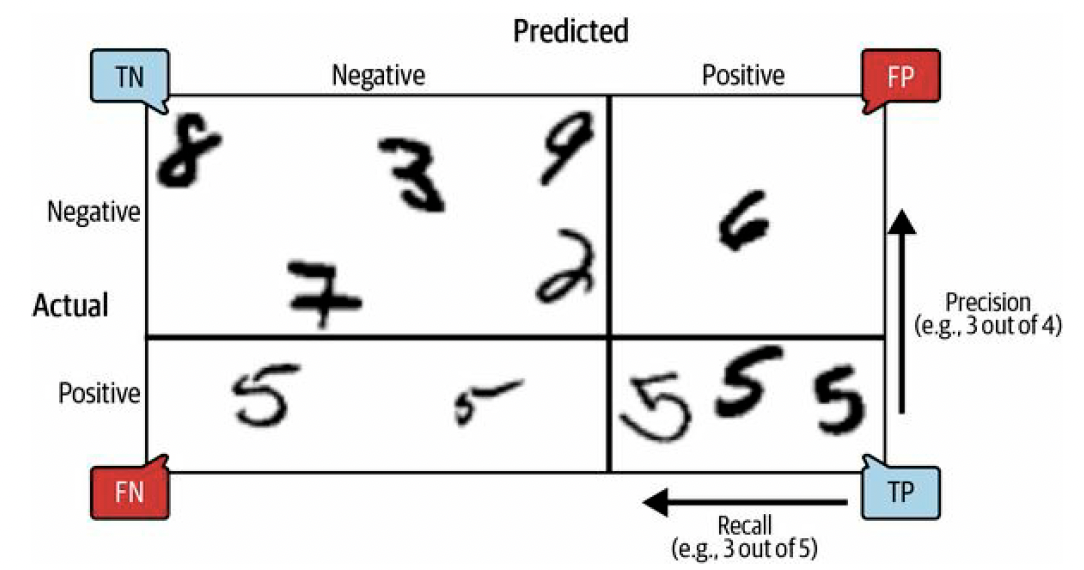

**Figura 3.2.2.1.** Una matriz de confusión ilustrada mostrando ejemplos de verdaderos negativos (*true negatives*, arriba a la izquierda), falsos positivos (*false positives*, arriba a la derecha), falsos negativos (*false negatives*, abajo a la izquierda), y verdaderos positivos (*true positives*, abajo a la derecha).

Un clasificador con **precisión perfecta** puede ser *trivial* porque puede obtenerse sin realmente “saber” clasificar bien. Veamos por qué.

---

# ✅ ¿Qué significa tener precisión perfecta?

La **precisión** (*precision*) mide:

[
\text{precisión} = \frac{TP}{TP + FP}
]

Es decir: *de todas las predicciones positivas que hizo el modelo, cuántas fueron correctas*.

---

# ✅ ¿Cómo se obtiene una precisión perfecta de manera trivial?

Imagina que un modelo **siempre predice "negativo"**, excepto *una vez*, cuando está muy seguro, y predice "positivo".

Si justo esa única predicción positiva es correcta:

* TP = 1 (acertó la única predicción positiva)
* FP = 0 (no cometió ningún falso positivo)

Entonces:

[
\text{precisión} = \frac{1}{1 + 0} = 1 = 100%
]

¡Listo! El modelo tiene **precisión perfecta**.

Pero lo hizo sin realmente clasificar bien. Solo dijo "NO" a casi todo.


## Precisión y sensibilidad

scikit-learn proporciona una serie de funciones para calcular metricas de clasificacion, incluyendo la precision y la sensibilidad


In [31]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [32]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [33]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

Ahora nuestro detector de '5' no luce tan bien como antes cuando mirabamos la precision. cuando el clasificador indica que la imagen es un '5', es correcto solo el 85,7% de las veces, ademas, solo detecta el 84,0% de los ''5'

a veces es conveniente combinar estas dos metricas de precision y sensibilidad en una sola metrica llamada puntuacion F1, especialmente cuando necesitas una unica sola metrica para comparar un clasificador. 

la puntuacion F1 es la media armónica de la precision y la sensibilidad

nota: La media armónica (designada usualmente mediante H) de una cantidad finita de números es igual al recíproco, o inverso, de la media aritmética de los recíprocos de dichos valores y es recomendada para promediar velocidades.

Así, dados n números x1, x2, ... , xn la media armónica será igual a:

{\displaystyle {H}={\frac {n}{\sum _{i=1}^{n}{\cfrac {1}{x_{i}}}}}={\frac {n}{{\cfrac {1}{x_{1}}}+\cdots +{\cfrac {1}{x_{n}}}}}}

La media armónica resulta poco influida por la existencia de determinados valores mucho más grandes que el conjunto de los otros, siendo en cambio sensible a valores mucho más pequeños que el conjunto.

La media armónica no está definida en el caso de que exista algún valor nulo.

donde la media aritmetica trata a todos los valores por igual, la media armonica le da mas peso a los valores mas pequeños, como resultado, la puntuacion f1 será alta solo si la precision y la sensibilidad sean altas las dos. para calcular la puntuacion F1 usemos solo la funcion f1_score()

In [34]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [35]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

la puntuacion f1 favorece a los clasificadores que tienen valores de precision y sensibilidad similiraes. algunas veces esto no es realmente lo que queremos, ya que en algunos contextos nos interesará una precision alta, pero en otras nos interesará una sensibilidad alta. por desgracia, no vas a poder tener esto en ambos sentidos, incrementar la precision reducira la sensibilidad, e incrementar la sensiblidad reducirá la precision. esto se llama precision/recall trade off

## El compromiso entre la precision y la sensibilidad 

para entender este compromiso, echemos un vistazo a cómo el clasificador SGDClassifier hace la decisión de clasificacion. para cada decisión, calcula una puntuacion basada en una decision de clasificacion. si esa puntuacion es superior a un umbral, asigna la instancia a la clase positiva. en caso contrario, la asigna a la clase negativa. scikit-learn no permite establecer el umbral directamente, pero si nos da acceso a las puntuaciones de decision que utiliza para hacer las predicciones. en lugar de llamar al metodo predict() del clasifciador, podemos llamar al metodo decision_function(), que devuelve una puntuación para cada instancia, y ahi podemos usar el umbral que queramos para hacer predicciones basadas en esas puntuaciones. 

In [36]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [37]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [38]:
y_scores > 0

array([ True])

In [39]:
y_some_digit_pred

array([ True])

In [40]:
# extra code – just shows that y_scores > 0 produces the same result as
#              calling predict()
y_scores > 0

array([ True])

el SGDClassifier usa un umbral de cero, por lo que el codigo anterior devuelve el mismo resultado que el metodo predict(). Aumentemos el umbral:

In [41]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

esto confirma que aumentar el umbral reduce la sensibilidad (recall). la imagen realmente represetna el dígito '5', y el clasificador lo detecta cuando elumbral es cero, pero se equivoca cuando el umbral se aumenta a 3000. ¿como podemos decidir qué umbral utilizar? Bueno, primero habría que utilizar la funcion cross_val_predcit() para obtener la puntuacion de todas las instancias del conjunto de datos de entrenamiento, pero esta vez indicamos que queremos obtener las puntuaciones de decision, en lugar de las predicciones

In [42]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

con estas puntaciones, utilizamos la funcion precision_recall_curve() para calcular la precision y la sensibilidad para todos los posibles umbrales (la función añade una última precisión de 0 y un último recall de 1, correspondientes a un umbral infinito):

In [43]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

finalmente, y usando matplotlib para graficar la curva de precision/sensibilidad como funciones del valor del umbral. veamos con el umbral de 3000 de antes

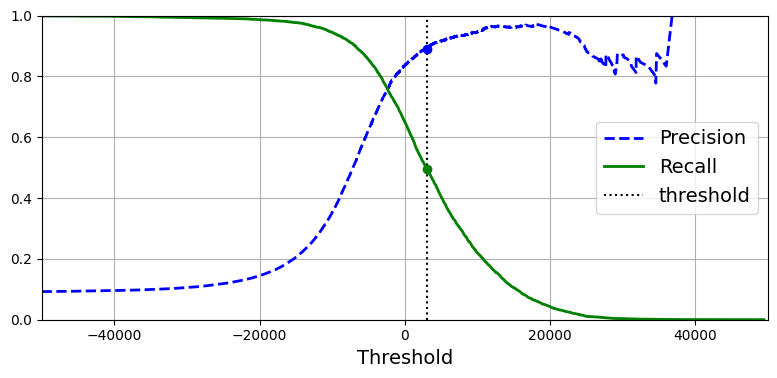

In [44]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

NOTA
Puede que te preguntes por qué la curva de precisión es más irregular que la curva de recall. La razón es que la precisión a veces puede disminuir cuando aumentas el umbral (aunque en general tiende a subir). Por otro lado, el recall solo puede disminuir cuando el umbral aumenta, lo que explica por qué su curva se ve suave.

a este valor de umbral (3000) la precision esta cerca del 90% y la sensibilidad está sobre el 50%. otra forma de elegir un buen umbral para este 'trade-off' entre la precision y la sensibilidad es graficar la precision directamente contra la sensibilidad.

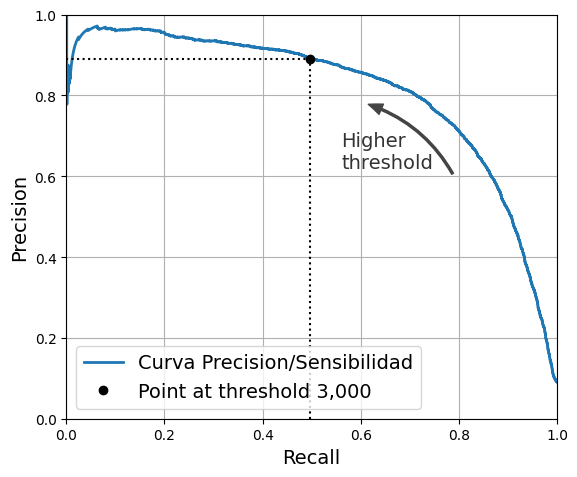

In [45]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Curva Precision/Sensibilidad")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

se puede ver que la precision realmemten cae abruptamente mas o menos al 80% de la sensibilidad. la decision del umbral dependerá del proyecto, por supeusto. supongamos que queremos un 90% de precisioni. podemos usar el primer plot que hicimos antes para encontrar el umbral que queremos usar, pero no es muy preciso. de forma alternativa, podemos buscar el umbral mas pequeño para el cual obtenemos una precision del 90%. para esto, podemos usar el metodo argmax() de NumPy. esto devuelve el primer indice del valor maximo, que en este caso significa el primer valor verdadero.

In [46]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

para hacer predicciones (de momento sobre el conjunto de datos de entrenamiento), en lugar de llamar al metodo predic() del clasificador, podemos ejecutar el siguiente codigo:

In [47]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

vamos a verificar la precision y la sensibilidad para estas predicciones

In [48]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [49]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

genial, tenemos un clasificador con una precision del 90%. es facil crear un clasificador con la precisión que queramos. solo debemos aumentar el umbral, y lo tenemos. pero claro, un clasificador con una precision alta no es muy util si la sensibilidad o recall es muy bajo. para muchas aplicaciones, un 48% de sensibilidad no es muy bueno. si alguien pregunta o dice que va a construir un clasificador con una precision del 99%, deberíamos preguntarle, a costo de cuánta sensibilidad?

## La curva ROC
La curva ROC (receiver operating characteristic) es otra herramienta comúnmente usada con clasificadores binarios. Es muy similar a la curva de precisión/recall, pero en lugar de representar precisión frente a recall, la curva ROC representa la tasa de verdaderos positivos (otro nombre para recall) frente a la tasa de falsos positivos (FPR).

La FPR (también llamada fall-out) es la proporción de instancias negativas que se clasifican incorrectamente como positivas. Es igual a 1 menos la tasa de verdaderos negativos (TNR), que es la proporción de instancias negativas clasificadas correctamente como negativas. La TNR también se llama especificidad. Por lo tanto, la curva ROC representa la sensibilidad (recall) frente a 1 – especificidad.

Para trazar la curva ROC, primero usas la función roc_curve() para calcular la TPR y la FPR para varios valores de umbral:

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

luego de esto podemos graficar el FPR frente al TPR usando matplotlib. para encontrar el punto que se corresponde con el 90% en precision, necesitamos mirar los indices del umbral deseado. dado que los umbrales estan listados en orden decreciente en este caso, usaremos <= en lugar de >= en la primera línea:

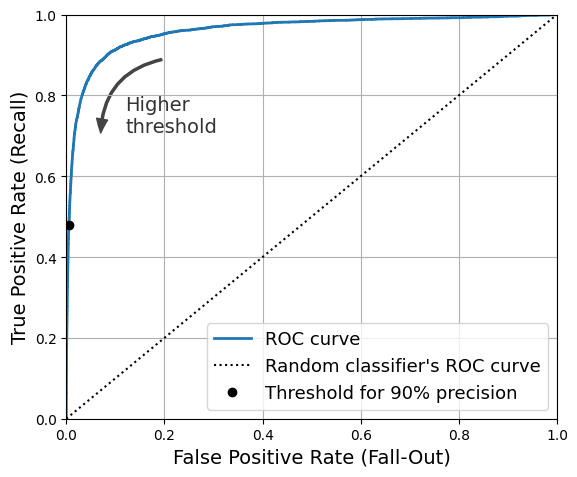

In [51]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

Una vez más, existe un compromiso: cuanto mayor es el recall (TPR), más falsos positivos (FPR) produce el clasificador. La línea punteada representa la curva ROC de un clasificador completamente aleatorio; un buen clasificador se mantiene lo más alejado posible de esa línea (hacia la esquina superior izquierda).

Una forma de comparar clasificadores es medir el área bajo la curva (AUC). Un clasificador perfecto tendrá un ROC AUC igual a 1, mientras que un clasificador completamente aleatorio tendrá un ROC AUC igual a 0.5. Scikit-Learn proporciona una función para estimar el ROC AUC:

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

Dado que la curva ROC es muy similar a la curva de precisión/recall (PR), puede que te preguntes cómo decidir cuál usar. Como regla general, deberías preferir la curva PR cuando la clase positiva es rara o cuando te importan más los falsos positivos que los falsos negativos. En caso contrario, usa la curva ROC.

Por ejemplo, al observar la curva ROC anterior (y la puntuación ROC AUC), podrías pensar que el clasificador es realmente bueno. Pero esto se debe principalmente a que hay pocas instancias positivas (los 5) en comparación con las negativas (los no-5). En contraste, la curva PR deja claro que el clasificador tiene margen de mejora: la curva podría estar mucho más cerca de la esquina superior derecha.

vamos a crear ahora un RandomForestClassifier, cuya curva de precisión vs sensibilidad y puntuacino F1 podemos comparar a las del clasificador SGDClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

La función precision_recall_curve() espera etiquetas y puntuaciones para cada instancia, así que necesitamos entrenar el clasificador RandomForest y hacer que asigne una puntuación a cada instancia. Pero la clase RandomForestClassifier no tiene un método decision_function(), debido a la forma en que funciona. Por suerte, tiene un método predict_proba() que devuelve las probabilidades de cada clase para cada instancia, y podemos simplemente usar la probabilidad de la clase positiva como puntuación, así que funcionará sin problemas.

Podemos llamar a la función cross_val_predict() para entrenar el RandomForestClassifier usando validación cruzada y hacer que prediga probabilidades de clase para cada imagen de la siguiente manera:

In [54]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

veamos las probabilidades de clase de las dos primeras imagenes del conjunto de entrenamiento:

In [55]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

el modelo predice que la primera imagen es positiva con una probabilidad del 89%, y predice que la segunda imagen es negativa con un 99% de probabilidad. como cada imagen es positiva o negativa, la suma de las probabilidades en cada fila es del 100%

## ADVERTENCIA
Estas son probabilidades estimadas, no probabilidades reales. Por ejemplo, si observas todas las imágenes que el modelo clasificó como positivas con una probabilidad estimada entre el 50% y el 60%, aproximadamente el 94% de ellas son realmente positivas. Así que, en este caso, las probabilidades estimadas por el modelo eran demasiado bajas… pero los modelos también pueden ser excesivamente confiados.

El paquete sklearn.calibration contiene herramientas para calibrar las probabilidades estimadas y acercarlas mucho más a las probabilidades reales.

la segunda columna contiene las pribabilidades estimadas para la clase positiva, asique pasemoslas  a la función precision_recall_curve()

In [56]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

Ahora estamos en disposicion de graficar la curva PR. es util graficar tambien la primera curva PR tambien, asi podemos comparar

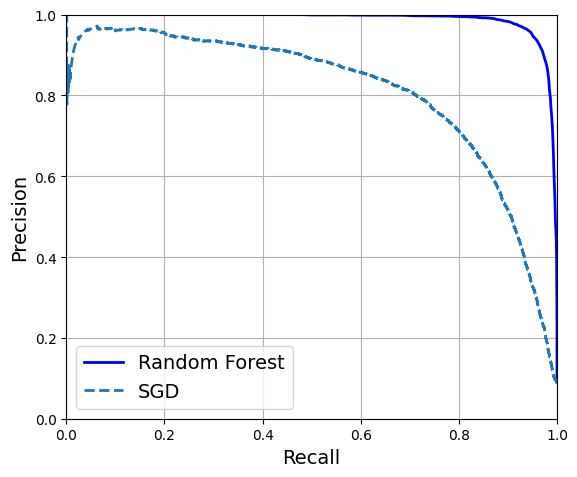

In [57]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()


como se puede ver, el RandomForestClassifier y su curva PR luce mucho mejor que el SGDClassifier, se acerca mucho mas a la esuqina superior derecha. su puntuacion F1 y su puntuacion ROC AUC son tambien mucho mejores:

In [58]:
y_train_pred_forest = y_probas_forest[:,1] >=0.5 # probabilidad positiva >= 50%
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [59]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

intenta medir las puntuaciones de precision y sensibilidad: dbeerías encontrar algo sobre el 99.1% de precision y un 86.6% de sensibilidad. nada mal.

Ahora sabes entrenar un clasificador binario. elije una metrica apropieda para tu caso de uso, evalua el clasificador usnado validacion cruzada, selecciona el tradeoff entere precision y sensibilidad que se ajuste a tus necesidades y usa una serie de meetricas y curvas para comparar varios modelos. ahora podemos intentar dtecetar más de un unico digito.

## Clasificacion multiclase

Mientras que los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases.

Algunos clasificadores de Scikit-Learn (por ejemplo, LogisticRegression, RandomForestClassifier y GaussianNB) pueden manejar múltiples clases de forma nativa. Otros son estrictamente clasificadores binarios (por ejemplo, SGDClassifier y SVC). Sin embargo, existen varias estrategias que permiten realizar clasificación multiclase usando múltiples clasificadores binarios.

Una forma de crear un sistema capaz de clasificar imágenes de dígitos en 10 clases (del 0 al 9) es entrenar 10 clasificadores binarios, uno para cada dígito (un detector de 0, un detector de 1, un detector de 2, etc.). Luego, cuando quieras clasificar una imagen, obtienes la puntuación de decisión de cada clasificador para esa imagen y seleccionas la clase cuyo clasificador produzca la puntuación más alta. Esto se llama la estrategia uno contra el resto (OvR), o a veces uno contra todos (OvA).

Otra estrategia es entrenar un clasificador binario para cada par de dígitos: uno que distinga entre 0 y 1, otro entre 0 y 2, otro entre 1 y 2, y así sucesivamente. Esto se denomina estrategia uno contra uno (OvO). Si hay N clases, necesitas entrenar N × (N – 1) / 2 clasificadores. Para el problema de MNIST, ¡esto implica entrenar 45 clasificadores binarios! Cuando quieras clasificar una imagen, debes pasarla por los 45 clasificadores y ver qué clase gana más “duelos”. La principal ventaja de OvO es que cada clasificador solo necesita entrenarse con la parte del conjunto de entrenamiento que contiene las dos clases que debe distinguir.

Algunos algoritmos (como los clasificadores de máquinas de vectores de soporte) escalan mal con el tamaño del conjunto de entrenamiento. Para estos algoritmos se prefiere OvO, ya que es más rápido entrenar muchos clasificadores con conjuntos pequeños que entrenar unos pocos clasificadores con conjuntos grandes. Sin embargo, para la mayoría de algoritmos de clasificación binaria, se prefiere OvR.

Scikit-Learn detecta cuando intentas usar un algoritmo de clasificación binaria para una tarea de clasificación multiclase, y ejecuta automáticamente OvR u OvO, dependiendo del algoritmo. Probemos esto con un clasificador de máquina de vectores de soporte utilizando la clase sklearn.svm.SVC. Solo entrenaremos con las primeras 2.000 imágenes, de lo contrario, llevará muchísimo tiempo:

In [60]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000], y_train[:2000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


entrenamos el SVC utilizando las clases objetivo originales del 0 al 9 (y_train), en lugar de las clases objetivo de 5 contra el resto (y_train_5). Dado que hay 10 clases (es decir, más de 2), Scikit-Learn utilizó la estrategia OvO y entrenó 45 clasificadores binarios. Ahora hagamos una predicción sobre una imagen:

In [61]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

¡Correcto! Este código en realidad hizo 45 predicciones—una por cada par de clases—y seleccionó la clase que ganó más duelos. Si llamas al método decision_function(), verás que devuelve 10 puntuaciones por instancia: una por cada clase. Cada clase obtiene una puntuación igual al número de duelos ganados, más o menos un pequeño ajuste (máx. ±0.33) para desempatar, basado en las puntuaciones de los clasificadores:

In [62]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

La puntuacion más alta es 9.3 y es en efecto  la que se corresponde con la clase '5'

In [63]:
class_id = some_digit_scores.argmax()
class_id

5

Cuando se entrena un clasificador, este almacena la lista de clases objetivo en su atributo classes_, ordenadas por valor. En el caso de MNIST, el índice de cada clase en el array classes_ coincide convenientemente con la propia clase (por ejemplo, la clase en el índice 5 resulta ser la clase “5”), pero en general no tendrás tanta suerte; tendrás que buscar la etiqueta de la clase de esta manera:

In [64]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [65]:
svm_clf.classes_[class_id]

'5'

Si quieres forzar a Scikit-Learn a usar la estrategia uno contra uno (OvO) o uno contra el resto (OvR), puedes usar las clases OneVsOneClassifier o OneVsRestClassifier. Simplemente crea una instancia y pasa un clasificador a su constructor (ni siquiera tiene que ser un clasificador binario). Por ejemplo, este código crea un clasificador multiclase usando la estrategia OvR, basado en un SVC:

In [66]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

,estimator,SVC(random_state=42)
,n_jobs,None
,verbose,0
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001


Hagamos una prediccion, y veamos el numero de clasificadores entrenados

In [67]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [68]:
len(ovr_clf.estimators_)

10

Entrenar un SGDClassifier sobre un conjunto de datos multiclase y usarlo para hacer predicciones es así de sencillo

In [69]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

Oops, that’s incorrect. Prediction errors do happen! This time Scikit-Learn
used the OvR strategy under the hood: since there are 10 classes, it trained 10
binary classifiers. The decision_function() method now returns one value per
class.

Let’s look at the scores that the SGD classifier assigned to each class:

In [70]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

You can see that the classifier is not very confident about its prediction:
almost all scores are very negative, while class 3 has a score of +1,824, and
class 5 is not too far behind at –1,386. Of course, you’ll want to evaluate this
classifier on more than one image. Since there are roughly the same number
of images in each class, the accuracy metric is fine. As usual, you can use the
cross_val_score() function to evaluate the model:

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

It gets over 85.8% on all test folds. If you used a random classifier, you
would get 10% accuracy, so this is not such a bad score, but you can still do
much better. Simply scaling the inputs increases
accuracy above 89.1%:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

## Error Analysis

If this were a real project, you would now follow the steps in your machine
learning project checklist. You’d explore data preparation
options, try out multiple models, shortlist the best ones, fine-tune their
hyperparameters using GridSearchCV, and automate as much as possible.
Here, we will assume that you have found a promising model and you want
to find ways to improve it. One way to do this is to analyze the types of errors
it makes.

First, look at the confusion matrix. For this, you first need to make
predictions using the cross_val_predict() function; then you can pass the
labels and predictions to the confusion_matrix() function. However, since there are now 10 classes instead of 2, the confusion
matrix will contain quite a lot of numbers, and it may be hard to read.
A colored diagram of the confusion matrix is much easier to analyze. To plot
such a diagram, use the ConfusionMatrixDisplay.from_predictions() function
like this:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

This confusion matrix looks
pretty good: most images are on the main diagonal, which means that they
were classified correctly. Notice that the cell on the diagonal in row #5 and
column #5 looks slightly darker than the other digits. This could be because
the model made more errors on 5s, or because there are fewer 5s in the
dataset than the other digits. That’s why it’s important to normalize the
confusion matrix by dividing each value by the total number of images in the
corresponding (true) class (i.e., divide by the row’s sum). This can be done
simply by setting normalize="true". We can also specify the
values_format=".0%" argument to show percentages with no decimals.

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize="true", values_format=".0%")
plt.show()

Now we can easily see that only 82% of the images of 5s were classified
correctly. The most common error the model made with images of 5s was to
misclassify them as 8s: this happened for 10% of all 5s. But only 2% of 8s
got misclassified as 5s; confusion matrices are generally not symmetrical! If
you look carefully, you will notice that many digits have been misclassified
as 8s, but this is not immediately obvious from this diagram. If you want to
make the errors stand out more, you can try putting zero weight on the correct
predictions.

In [ ]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, sample_weight=sample_weight, normalize="true", values_format=".0%")
plt.show()

Now you can see much more clearly the kinds of errors the classifier makes.
The column for class 8 is now really bright, which confirms that many
images got misclassified as 8s. In fact this is the most common
misclassification for almost all classes. But be careful how you interpret the
percentages in this diagram: remember that we’ve excluded the correct
predictions. For example, the 36% in row #7, column #9 does not mean that
36% of all images of 7s were misclassified as 9s. It means that 36% of the
errors the model made on images of 7s were misclassifications as 9s. In
reality, only 3% of images of 7s were misclassified as 9s,

It is also possible to normalize the confusion matrix by column rather than by
row: if you set normalize="pred", For example, you can see that 56% of misclassified 7s are
actually 9s.

Analyzing the confusion matrix often gives you insights into ways to improve
your classifier. Looking at these plots, it seems that your efforts should be
spent on reducing the false 8s. For example, you could try to gather more
training data for digits that look like 8s (but are not) so that the classifier can
learn to distinguish them from real 8s. Or you could engineer new features
that would help the classifier—for example, writing an algorithm to count the
number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could
preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make
some patterns, such as closed loops, stand out more.

Analyzing individual errors can also be a good way to gain insights into what
your classifier is doing and why it is failing. For example, let’s plot examples
of 3s and 5s in a confusion matrix style

In [ ]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [ ]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

As you can see, some of the digits that the classifier gets wrong (i.e., in the
bottom-left and top-right blocks) are so badly written that even a human
would have trouble classifying them. However, most misclassified images
seem like obvious errors to us. It may be hard to understand why the
classifier made the mistakes it did, but remember that the human brain is a
fantastic pattern recognition system, and our visual system does a lot of complex preprocessing before any information even reaches our
consciousness. So, the fact that this task feels simple does not mean that it is.
Recall that we used a simple SGDClassifier, which is just a linear model: all
it does is assign a weight per class to each pixel, and when it sees a new
image it just sums up the weighted pixel intensities to get a score for each
class. Since 3s and 5s differ by only a few pixels, this model will easily
confuse them.

The main difference between 3s and 5s is the position of the small line that
joins the top line to the bottom arc. If you draw a 3 with the junction slightly
shifted to the left, the classifier might classify it as a 5, and vice versa. In
other words, this classifier is quite sensitive to image shifting and rotation.
One way to reduce the 3/5 confusion is to preprocess the images to ensure
that they are well centered and not too rotated. However, this may not be easy
since it requires predicting the correct rotation of each image. A much
simpler approach consists of augmenting the training set with slightly shifted
and rotated variants of the training images. This will force the model to learn
to be more tolerant to such variations. This is called data augmentation

# Multilabel Classification
Until now, each instance has always been assigned to just one class. But in
some cases you may want your classifier to output multiple classes for each
instance. Consider a face-recognition classifier: what should it do if it
recognizes several people in the same picture? It should attach one tag per
person it recognizes. Say the classifier has been trained to recognize three
faces: Alice, Bob, and Charlie. Then when the classifier is shown a picture of
Alice and Charlie, it should output [True, False, True] (meaning “Alice yes,
Bob no, Charlie yes”). Such a classification system that outputs multiple
binary tags is called a multilabel classification system.
We won’t go into face recognition just yet, but let’s look at a simpler
example, just for illustration purposes:

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

This code creates a y_multilabel array containing two target labels for each
digit image: the first indicates whether or not the digit is large (7, 8, or 9), and
the second indicates whether or not it is odd. Then the code creates a
KNeighborsClassifier instance, which supports multilabel classification (not
all classifiers do), and trains this model using the multiple targets array. Now
you can make a prediction, and notice that it outputs two labels:

In [ ]:
knn_clf.predict([some_digit])

And it gets it right! The digit 5 is indeed not large (False) and odd (True).

There are many ways to evaluate a multilabel classifier, and selecting the
right metric really depends on your project. One approach is to measure the
F score for each individual label (or any other binary classifier metric
discussed earlier), then simply compute the average score. The following
code computes the average F score across all labels:

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

This approach assumes that all labels are equally important, which may not
be the case. In particular, if you have many more pictures of Alice than of
Bob or Charlie, you may want to give more weight to the classifier’s score on
pictures of Alice. One simple option is to give each label a weight equal to its
support (i.e., the number of instances with that target label). To do this,
simply set average="weighted" when calling the f1_score() function.

In [ ]:
# extra code – shows that we get a negligible performance improvement when we
#              set average="weighted" because the classes are already pretty
#              well balanced.
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

If you wish to use a classifier that does not natively support multilabel
classification, such as SVC, one possible strategy is to train one model per
label. However, this strategy may have a hard time capturing the
dependencies between the labels. For example, a large digit (7, 8, or 9) is
twice more likely to be odd than even, but the classifier for the “odd” label
does not know what the classifier for the “large” label predicted. To solve this
issue, the models can be organized in a chain: when a model makes a
prediction, it uses the input features plus all the predictions of the models that
come before it in the chain.

The good news is that Scikit-Learn has a class called ChainClassifier that
does just that! By default it will use the true labels for training, feeding each
model the appropriate labels depending on their position in the chain. But if
you set the cv hyperparameter, it will use cross-validation to get “clean” (outof-
sample) predictions from each trained model for every instance in the
training set, and these predictions will then be used to train all the models
later in the chain. Here’s an example showing how to create and train a
ChainClassifier using the cross-validation strategy. As earlier, we’ll just use
the first 2,000 images in the training set to speed things up:

In [ ]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

Now we can use this ChainClassifier to make predictions:

In [ ]:
chain_clf.predict([some_digit])

# Multioutput Classification
The last type of classification task we’ll discuss here is called multioutput–
multiclass classification (or just multioutput classification). It is a
generalization of multilabel classification where each label can be multiclass
(i.e., it can have more than two possible values).
To illustrate this, let’s build a system that removes noise from images. It will
take as input a noisy digit image, and it will (hopefully) output a clean digit
image, represented as an array of pixel intensities, just like the MNIST
images. Notice that the classifier’s output is multilabel (one label per pixel)
and each label can have multiple values (pixel intensity ranges from 0 to
255). This is thus an example of a multioutput classification system.

NOTE
The line between classification and regression is sometimes blurry, such as in this
example. Arguably, predicting pixel intensity is more akin to regression than to
classification. Moreover, multioutput systems are not limited to classification tasks; you
could even have a system that outputs multiple labels per instance, including both class
labels and value labels.

Let’s start by creating the training and test sets by taking the MNIST images
and adding noise to their pixel intensities with NumPy’s randint() function.
The target images will be the original images:

In [ ]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Let’s take a peek at the first image from the test set (Figure 3-12). Yes, we’re
snooping on the test data, so you should be frowning right now.

In [ ]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

On the left is the noisy input image, and on the right is the clean target image.
Now let’s train the classifier and make it clean up this image

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()

Looks close enough to the target! You now know how to select good metrics for classification tasks, pick the
appropriate precision/recall trade-off, compare classifiers, and more generally
build good classification systems for a variety of tasks.